# REVENUE GROWTH & ANALYSIS OF INDUSTRY TRENDS

This is a supervised, regression machine learning task: which has a given a set of data with targets, 
I want to train a model that can learn to map the features (also known as the explanatory variables) to the target.
Therefore, its a:-
i)Supervised problem: which has both the features and the target
ii)Regression problem: the target is a continous variable, in this case ranging zero the highest
During training, we want the model to learn the relationship between the features and the values so we give it both the features and the
answer. Then, to test how well the model has learned, we evaluate it on a testing set where it has never seen the answers!
The notebook will be presented as follow :

Data collection
Data Preprocessing & Cleansing
Exploratory data analysis & Visualisation
Data Modeling
Evaluting the Model
Model Flask API Development

# Imports
I am going to use the standard data science and machine learning libraries:
numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.

In [200]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
# pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns


# Splitting data into training and testing
#from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting also known as Data processing and cleansing.
Load in the Data and Examine.
We will be loading our data into a pandas dataframe, one of the most useful data structures for data science.
Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize.
To help make the data science/machine learning pipeline as smooth as possible.


In [201]:
# Read in data into a dataframe 
df = pd.read_csv('C:/Users/faimu/Downloads/Ongoza data.csv')

In [202]:
# See the column data types and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 38 columns):
application_year             1856 non-null int64
selected                     1034 non-null float64
showup                       1021 non-null float64
finished                     1828 non-null float64
info_venture_country         1856 non-null object
info_venture_country_hq      1856 non-null object
venture region               1856 non-null object
info_has_website             1856 non-null int64
info_founding_year           1848 non-null float64
info_legal_status            1856 non-null object
info_sector                  1842 non-null object
info_financial_goals         1856 non-null object
fins_revenues_m1             1856 non-null float64
fins_revenues_sincefound     1856 non-null float64
fins_profit_m1               1793 non-null object
fins_ft_employees_m1         1856 non-null int64
fins_pt_employees_m1         1856 non-null int64
found_name1_present          1855 non-nul

There are a number of columns with numbers that have been recorded as object datatypes. 
These will have to be converted to float datatype before we can do any numerical analysis.

CONVERSION OF DATA TO CORRECT TYPES

(optional)Convert Data to Correct Types
We convert the columns with numbers into numeric data types by replacing the "Not Available" entries with np.nan 
which can be interpreted as floats.Then we will convert the columns that contain numeric values into numeric datatypes.

In [146]:
#df.replace({'Not Available': np.nan})
# Iterate through the columns
#for col in list(df.columns):
    # Select columns that should be numeric
    #if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        #col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
#data[col] = data[col].astype(float)

In [147]:
# Statistics for each column
#summary of the data
df.describe()

,application_year,selected,showup,finished,info_has_website,info_founding_year,fins_revenues_m1,fins_revenues_sincefound,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age
count,1856.000000,1034.000000,1021.000000,1828.000000,1856.000000,1848.000000,1.856000e+03,1.856000e+03,1856.000000,1856.000000,1855.000000,1855.000000,1855.000000,1705.000000,1815.000000,1469.000000,845.000000,1815.000000
mean,2015.399784,0.197292,0.180215,0.237418,0.714978,2011.885823,1.475077e+05,2.157293e+06,7.574353,6.404634,0.997844,0.809704,0.469003,1.029912,35.689807,36.042886,35.489941,35.862534
std,0.757126,0.398147,0.384555,0.425617,0.451546,4.086299,7.236814e+05,4.414106e+07,19.228429,24.976270,0.046399,0.392641,0.499173,5.029577,9.869444,11.505664,11.997293,8.934388
min,2014.000000,0.000000,0.000000,0.000000,0.000000,1965.000000,1.000000e-01,8.600000e-01,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,1.000000,1.000000,1.000000,19.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,4.000000e+03,7.000000e+03,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.000000,28.000000,27.000000,29.333333
50%,2016.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,1.740000e+04,4.000000e+04,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,33.000000,33.000000,32.000000,34.000000
75%,2016.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,7.468725e+04,1.913366e+05,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,40.000000,42.000000,41.000000,41.333333
max,2016.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,1.853536e+07,1.659025e+09,400.000000,500.000000,1.000000,1.000000,1.000000,150.000000,85.000000,82.000000,78.000000,85.000000


In [148]:
# Display top of dataframe
df.head()

,application_year,selected,showup,finished,info_venture_country,info_venture_country_hq,venture region,info_has_website,info_founding_year,info_legal_status,info_sector,info_financial_goals,fins_revenues_m1,fins_revenues_sincefound,fins_profit_m1,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age,Average Team Age Grouping,found_name1_gender,found_name2_gender,found_name3_gender,found_name1_born,found_name2_born,found_name3_born,found_name1_resides,found_name2_resides,found_name3_resides,found_name1_education,found_name2_education,found_name3_education
0,2016,1.0,1.0,1.0,Rwanda,Rwanda,Sub-Saharan Africa,1,2015.0,For-profit company,Water,Cover costs and earn some profit,3750.0,5065.0,16% - 20%,2,10,1.0,0.0,0.0,0.0,19.0,NaN,NaN,19.000000,19-25,F,NaN,NaN,Rwanda,NaN,NaN,Rwanda,NaN,NaN,Associate Degree,NaN,NaN
1,2015,NaN,NaN,0.0,Kenya,Kenya,Sub-Saharan Africa,1,2013.0,For-profit company,Energy,Cover costs and earn some profit,15673.0,17830.0,Unsure,10,1,1.0,1.0,0.0,0.0,19.0,NaN,NaN,19.000000,19-25,M,M,NaN,Kenya,Kenya,NaN,Kenya,Kenya,NaN,High school,High school,NaN
2,2014,NaN,NaN,0.0,India,India,South Asia,1,2013.0,For-profit company,Energy,Cover costs and earn some profit,3340.0,5840.0,0% - 5%,1,4,1.0,1.0,1.0,0.0,20.0,21.0,19.0,20.000000,19-25,M,M,M,India,India,India,India,India,India,NaN,NaN,NaN
3,2016,0.0,NaN,NaN,Mexico,Mexico,Latin America & Caribbean,0,2015.0,For-profit company,Health,Cover costs and earn some profit,1452.5,1452.5,6% - 10%,3,4,1.0,1.0,1.0,2.0,23.0,19.0,20.0,20.666667,19-25,M,F,F,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,High school,High school,High school
4,2016,0.0,0.0,0.0,Rwanda,Rwanda,Sub-Saharan Africa,0,2015.0,For-profit company,Energy,Cover costs and earn some profit,500.0,1000.0,6% - 10%,3,0,1.0,1.0,1.0,0.0,20.0,21.0,21.0,20.666667,19-25,F,F,F,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Bachelors degree / Honours degree


Taking a look at the raw data, there are a number of issues to solve.
First of all,the problem statement is that we want to predict the Revenue growth and Analysis of Sectors trends. 
Some of the other column definitions can be reasonably guessed, but others are difficult to understand 
I decided to try and find them on my own.(I did research with info_legal_status and still could not understand every column). 
In machine learning, this isn't actually a problem, because we let the model decide which features are important.
Sometimes we may not even be given column names or told what we are predicting like in my case it was just a dataset that any data scientist can use. Nonetheless, I like to understand the problem to the extent possible, and because i also want to interpret the model results, it would be a good idea to have some knowledge of the columns. I decided to try and find them on my own. 

# Data Types and Missing Values, unique values
It is a quick way to assess the data by displaying the data types of each column and the number of non-missing values.
We start analysis by looking at the percentage of missing values in each column.

In [149]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [150]:
missing_values_table(df)

Your selected dataframe has 38 columns.
There are 27 columns that have missing values.


,Missing Values,% of Total Values
found_name3_education,1038,55.9
found_name3_resides,1034,55.7
found_name3_age,1011,54.5
found_name3_born,1002,54.0
found_name3_gender,970,52.3
showup,835,45.0
selected,822,44.3
found_name2_education,494,26.6
found_name2_resides,435,23.4
found_name2_age,387,20.9


In [151]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 38 columns.
There are 27 columns that have missing values.
We will remove 5 columns.


In [152]:
# Drop the columns
df.drop(columns = list(missing_columns))

,application_year,selected,showup,finished,info_venture_country,info_venture_country_hq,venture region,info_has_website,info_founding_year,info_legal_status,info_sector,info_financial_goals,fins_revenues_m1,fins_revenues_sincefound,fins_profit_m1,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,Average Team Age,Average Team Age Grouping,found_name1_gender,found_name2_gender,found_name1_born,found_name2_born,found_name1_resides,found_name2_resides,found_name1_education,found_name2_education
0,2016,1.0,1.0,1.0,Rwanda,Rwanda,Sub-Saharan Africa,1,2015.0,For-profit company,Water,Cover costs and earn some profit,3750.000000,5.065000e+03,16% - 20%,2,10,1.0,0.0,0.0,0.0,19.0,NaN,19.000000,19-25,F,NaN,Rwanda,NaN,Rwanda,NaN,Associate Degree,NaN
1,2015,NaN,NaN,0.0,Kenya,Kenya,Sub-Saharan Africa,1,2013.0,For-profit company,Energy,Cover costs and earn some profit,15673.000000,1.783000e+04,Unsure,10,1,1.0,1.0,0.0,0.0,19.0,NaN,19.000000,19-25,M,M,Kenya,Kenya,Kenya,Kenya,High school,High school
2,2014,NaN,NaN,0.0,India,India,South Asia,1,2013.0,For-profit company,Energy,Cover costs and earn some profit,3340.000000,5.840000e+03,0% - 5%,1,4,1.0,1.0,1.0,0.0,20.0,21.0,20.000000,19-25,M,M,India,India,India,India,NaN,NaN
3,2016,0.0,NaN,NaN,Mexico,Mexico,Latin America & Caribbean,0,2015.0,For-profit company,Health,Cover costs and earn some profit,1452.500000,1.452500e+03,6% - 10%,3,4,1.0,1.0,1.0,2.0,23.0,19.0,20.666667,19-25,M,F,Mexico,Mexico,Mexico,Mexico,High school,High school
4,2016,0.0,0.0,0.0,Rwanda,Rwanda,Sub-Saharan Africa,0,2015.0,For-profit company,Energy,Cover costs and earn some profit,500.000000,1.000000e+03,6% - 10%,3,0,1.0,1.0,1.0,0.0,20.0,21.0,20.666667,19-25,F,F,Rwanda,Rwanda,Rwanda,Rwanda,Bachelors degree / Honours degree,Bachelors degree / Honours degree
5,2016,0.0,0.0,0.0,Cameroon,Cameroon,Sub-Saharan Africa,1,2015.0,For-profit company,Information and communication technologies,Cover costs and earn some profit,5000.000000,2.000000e+03,More than 20%,4,6,1.0,1.0,0.0,0.0,23.0,19.0,21.000000,19-25,M,F,Cameroon,Cameroon,Cameroon,Cameroon,Masters Degree,Bachelors degree / Honours degree
6,2015,NaN,NaN,0.0,Mexico,Mexico,Latin America & Caribbean,0,2014.0,For-profit company,Other,Cover costs and earn some profit,2534.870310,3.485447e+03,More than 20%,1,2,1.0,1.0,0.0,0.0,21.0,21.0,21.000000,19-25,M,F,Mexico,Mexico,Mexico,Mexico,Bachelors degree,Bachelors degree
7,2015,NaN,NaN,1.0,Rwanda,Rwanda,Sub-Saharan Africa,1,2013.0,For-profit company,Environment,Cover costs and earn some profit,10000.000000,1.200000e+04,16% - 20%,20,50,1.0,0.0,0.0,0.0,21.0,NaN,21.000000,19-25,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,NaN,NaN,1.0,Cameroon,Cameroon,Sub-Saharan Africa,0,2011.0,For-profit company,Agriculture,Cover costs and earn some profit,70000.000000,2.250000e+05,16% - 20%,3,3,1.0,0.0,0.0,0.0,21.0,NaN,21.000000,19-25,M,NaN,Cameroon,NaN,Cameroon,NaN,Bachelors degree,NaN
9,2014,NaN,NaN,0.0,Kenya,Kenya,Sub-Saharan Africa,1,2014.0,For-profit company,Other,Cover costs and earn some profit,200.000000,6.750000e+02,11% - 15%,1,0,1.0,0.0,0.0,0.0,21.0,NaN,21.000000,19-25,M,M,Kenya,NaN,Kenya,NaN,Bachelors degree,Less than 9th grade


In [153]:
df.describe()#summary of the data after dropping the missing values and dropping the columns.

,application_year,selected,showup,finished,info_has_website,info_founding_year,fins_revenues_m1,fins_revenues_sincefound,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age
count,1856.000000,1034.000000,1021.000000,1828.000000,1856.000000,1848.000000,1.856000e+03,1.856000e+03,1856.000000,1856.000000,1855.000000,1855.000000,1855.000000,1705.000000,1815.000000,1469.000000,845.000000,1815.000000
mean,2015.399784,0.197292,0.180215,0.237418,0.714978,2011.885823,1.475077e+05,2.157293e+06,7.574353,6.404634,0.997844,0.809704,0.469003,1.029912,35.689807,36.042886,35.489941,35.862534
std,0.757126,0.398147,0.384555,0.425617,0.451546,4.086299,7.236814e+05,4.414106e+07,19.228429,24.976270,0.046399,0.392641,0.499173,5.029577,9.869444,11.505664,11.997293,8.934388
min,2014.000000,0.000000,0.000000,0.000000,0.000000,1965.000000,1.000000e-01,8.600000e-01,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,1.000000,1.000000,1.000000,19.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,4.000000e+03,7.000000e+03,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.000000,28.000000,27.000000,29.333333
50%,2016.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,1.740000e+04,4.000000e+04,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,33.000000,33.000000,32.000000,34.000000
75%,2016.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,7.468725e+04,1.913366e+05,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,40.000000,42.000000,41.000000,41.333333
max,2016.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,1.853536e+07,1.659025e+09,400.000000,500.000000,1.000000,1.000000,1.000000,150.000000,85.000000,82.000000,78.000000,85.000000


In [154]:
df.nunique()

application_year               3
selected                       2
showup                         2
finished                       2
info_venture_country          97
info_venture_country_hq       99
venture region                 7
info_has_website               2
info_founding_year            32
info_legal_status              1
info_sector                   16
info_financial_goals           1
fins_revenues_m1             784
fins_revenues_sincefound     865
fins_profit_m1                 8
fins_ft_employees_m1          65
fins_pt_employees_m1          62
found_name1_present            2
found_name2_present            2
found_name3_present            2
found_additional_cnt          24
found_name1_age               57
found_name2_age               65
found_name3_age               64
Average Team Age             165
Average Team Age Grouping      7
found_name1_gender             2
found_name2_gender             2
found_name3_gender             2
found_name1_born             111
found_name

In [155]:
df.info_legal_status.nunique()

1

In [156]:
df.finished.nunique()

2

In [157]:
df.selected.nunique()

2

In [158]:
df.showup.nunique()

2

In [159]:
#df.found_name1_resides,found_name2_resides,found_name3_resides.value_counts

In [160]:
df.found_name2_age.value_counts() 

30.0    86
26.0    81
28.0    81
25.0    77
32.0    76
29.0    68
27.0    68
31.0    67
24.0    52
34.0    49
36.0    48
35.0    47
33.0    43
40.0    41
42.0    41
45.0    39
38.0    39
37.0    34
43.0    31
23.0    28
39.0    27
41.0    22
22.0    22
44.0    20
50.0    18
46.0    17
48.0    16
55.0    16
52.0    14
49.0    13
        ..
62.0    11
59.0    10
60.0    10
65.0    10
56.0    10
58.0     9
54.0     9
57.0     8
69.0     7
68.0     6
64.0     5
70.0     5
19.0     3
66.0     3
20.0     3
1.0      2
67.0     2
18.0     2
63.0     2
71.0     2
74.0     2
72.0     2
77.0     1
78.0     1
3.0      1
9.0      1
82.0     1
75.0     1
11.0     1
73.0     1
Name: found_name2_age, Length: 65, dtype: int64

In [161]:
df.found_name1_education.value_counts()

Bachelors degree / Honours degree    438
Masters Degree                       393
Bachelors degree                     293
Some graduate degree                 169
Technical/Vocational degree          159
High school                           88
PhD                                   39
Associate Degree                      30
Honours Degree                        16
Middle school                         13
Less than 9th grade                    7
Primary school                         4
None                                   2
Name: found_name1_education, dtype: int64

In [162]:
df.found_name2_education.value_counts()

Bachelors degree / Honours degree    354
Masters Degree                       280
Bachelors degree                     234
Technical/Vocational degree          144
Some graduate degree                 133
High school                           81
PhD                                   43
Middle school                         27
Associate Degree                      26
Less than 9th grade                   18
Honours Degree                        11
Primary school                         9
None                                   2
Name: found_name2_education, dtype: int64

In [163]:
df.found_name3_education.value_counts()

Bachelors degree / Honours degree    205
Bachelors degree                     144
Masters Degree                       143
Technical/Vocational degree           90
High school                           70
Some graduate degree                  65
Less than 9th grade                   39
PhD                                   17
Middle school                         16
Associate Degree                      15
Honours Degree                         6
Primary school                         5
None                                   3
Name: found_name3_education, dtype: int64

In [164]:
df.showup.value_counts()

0.0    837
1.0    184
Name: showup, dtype: int64

In [165]:
df.finished.value_counts()

0.0    1394
1.0     434
Name: finished, dtype: int64

In [166]:
df.selected.value_counts()

0.0    830
1.0    204
Name: selected, dtype: int64

In [167]:
df.found_name1_born.nunique()

111

In [168]:
df.found_name1_born.unique()

array(['Rwanda', 'Kenya', 'India', 'Mexico', 'Cameroon', nan,
       'Democratic Republic of the Congo', 'Uganda', 'Nigeria', 'Benin',
       'United States of America', 'Colombia', 'Ghana',
       'Russian Federation', 'Indonesia', 'Peru',
       'Congo, Republic of the...', 'Guatemala', 'Zambia', 'Canada',
       'Austria', 'Republic of Korea', 'Pakistan', 'Malawi', 'Georgia',
       'United Republic of Tanzania', 'Chile', 'Brazil', 'Sudan',
       'Liberia', 'Burundi', 'Italy', 'France', 'Zimbabwe', 'China',
       'Singapore', 'Philippines', 'Ecuador', "Côte d'Ivoire",
       'South Africa', 'Togo', 'Myanmar', 'Ethiopia', 'Israel', 'Algeria',
       'Nicaragua', 'Costa Rica', 'Senegal', 'Argentina', 'Madagascar',
       'Namibia', 'Chad',
       'United Kingdom of Great Britain and Northern Ireland', 'Romania',
       'Egypt', 'Mozambique', 'Germany', 'Equatorial Guinea', 'Spain',
       'Netherlands', 'Somalia', 'Burkina Faso', 'Nepal',
       'Dominican Republic', 'Viet Nam', 'So

In [169]:
df.found_name1_born.value_counts()

United States of America                                213
Kenya                                                   207
Mexico                                                  179
India                                                   161
Uganda                                                  149
Nigeria                                                 122
Colombia                                                 82
Nicaragua                                                52
United Republic of Tanzania                              45
Chile                                                    39
Ethiopia                                                 30
El Salvador                                              30
Peru                                                     27
Brazil                                                   23
Canada                                                   20
Ghana                                                    20
Zambia                                  

In [170]:
df.info_founding_year.unique()

array([2015., 2013., 2014., 2011., 2012., 2016., 2010., 2009., 2008.,
       2005.,   nan, 2003., 2006., 2004., 2007., 2002., 2000., 1973.,
       1974., 1996., 1997., 1998., 1993., 1965., 2001., 1999., 1983.,
       1992., 1977., 1995., 1980., 1987., 1990.])

In [171]:
df.info_founding_year.value_counts()

2014.0    373
2015.0    318
2013.0    287
2012.0    276
2011.0    170
2010.0    114
2009.0     88
2016.0     36
2008.0     33
2006.0     28
2007.0     28
2005.0     24
2003.0     12
2000.0      9
2001.0      9
2004.0      7
2002.0      6
1999.0      5
1998.0      4
1997.0      4
1992.0      4
1973.0      2
1990.0      2
1983.0      1
1993.0      1
1996.0      1
1987.0      1
1995.0      1
1965.0      1
1980.0      1
1974.0      1
1977.0      1
Name: info_founding_year, dtype: int64

In [172]:
df.groupby(['info_founding_year','selected','showup','finished'])

In [173]:
df.found_name2_born.unique()

array([nan, 'Kenya', 'India', 'Mexico', 'Rwanda', 'Cameroon',
       'Democratic Republic of the Congo', 'Uganda', 'Nigeria', 'Benin',
       'United States of America', 'Colombia', 'Ghana',
       'Russian Federation', 'Iran, Islamic Republic of...', 'Indonesia',
       'Peru', 'Congo, Republic of the...', 'Guatemala', 'Zambia',
       'Canada', 'United Kingdom of Great Britain and Northern Ireland',
       'Republic of Korea', 'Pakistan', 'Malawi',
       'United Republic of Tanzania', 'Chile', 'Brazil', 'Sudan', 'Spain',
       'Liberia', 'Germany', 'Ukraine', 'China', 'South Africa', 'Nepal',
       'Philippines', 'Zimbabwe', 'Ecuador', 'Kuwait', 'Togo',
       "Côte d'Ivoire", 'Burundi', 'Myanmar', 'Ethiopia', 'Israel',
       'Afghanistan', 'Senegal', 'Argentina', 'Madagascar', 'Chad',
       'Romania', 'Egypt', 'Mozambique', 'Nicaragua',
       'United Arab Emirates', 'Italy', 'Netherlands', 'Somalia',
       'Burkina Faso', 'Denmark', 'Malaysia', 'Viet Nam', 'South Korea',
    

In [174]:
df.found_name2_born.value_counts()

Kenya                                                   164
Mexico                                                  160
United States of America                                160
Uganda                                                  134
India                                                   130
Nigeria                                                  94
Colombia                                                 73
Nicaragua                                                41
United Republic of Tanzania                              41
Chile                                                    29
El Salvador                                              26
Peru                                                     21
Ethiopia                                                 21
Brazil                                                   19
Canada                                                   18
Ghana                                                    18
South Africa                            

In [175]:
df.found_name3_born.unique()

array([nan, 'India', 'Mexico', 'Rwanda',
       'Democratic Republic of the Congo', 'Nigeria', 'Benin',
       'United States of America', 'Colombia', 'Ghana', 'Pakistan',
       'Uganda', 'Indonesia', 'Peru',
       "Democratic People's Republic of Korea", 'China', 'Zambia',
       'France', 'United Republic of Tanzania', 'Kenya', 'Turkey',
       'Liberia', 'Guinea', 'Guatemala', 'Chile', 'Zimbabwe', 'Brazil',
       'Nepal', 'Philippines', 'Sudan', 'Canada', 'Togo',
       'Congo, Republic of the...', "Côte d'Ivoire", 'Burundi', 'Ecuador',
       'Malawi', 'Senegal', 'Argentina', 'Madagascar', 'South Africa',
       'Cameroon', 'Romania', 'Egypt', 'Mozambique', 'Nicaragua',
       'Netherlands', 'Somalia', 'Burkina Faso', 'Ethiopia', 'Viet Nam',
       'South Korea', 'Equatorial Guinea', 'Ireland', 'Singapore',
       'Poland', 'Malaysia', 'United Arab Emirates', 'Belgium',
       'Russian Federation', 'El Salvador', 'Lesotho', 'Bangladesh',
       'Austria', 'Venezuela, Bolivarian 

In [176]:
df.found_name3_born.value_counts()

Mexico                                   97
Uganda                                   89
Kenya                                    89
United States of America                 77
Nigeria                                  71
India                                    64
Colombia                                 41
Nicaragua                                26
United Republic of Tanzania              24
Chile                                    19
Ghana                                    11
Brazil                                   11
Peru                                     10
Indonesia                                10
Canada                                   10
El Salvador                               9
Zambia                                    9
Sudan                                     8
Liberia                                   8
South Africa                              7
Ethiopia                                  7
Democratic Republic of the Congo          7
Venezuela, Bolivarian Republic o

In [177]:
df.groupby(['selected','showup'])

How many applicants applied for the different sectors?

In [179]:
df.groupby(['selected','finished'])

In [180]:
df.get(['selected','finished','showup','sector'])

In [181]:
dic = {"selected":1, "finished":2,"showup":3,"sector":4} 
print(dic.get("selected")) 
print(dic.get("finished"))
print(dic.get("showup"))
print(dic.get("sector"))

1
2
3
4


In [182]:
dic.items()

dict_items([('selected', 1), ('finished', 2), ('showup', 3), ('sector', 4)])

In [183]:
df.fins_revenues_sincefound.value_counts()

1.000000e+04    54
5.000000e+04    48
1.000000e+05    35
5.000000e+03    32
2.000000e+04    32
2.000000e+03    29
2.000000e+05    28
3.000000e+04    27
1.000000e+03    25
1.500000e+04    24
4.000000e+04    22
2.500000e+04    22
3.000000e+03    21
1.500000e+05    21
3.000000e+05    21
3.500000e+04    21
4.000000e+03    20
1.200000e+04    20
6.000000e+03    17
2.500000e+05    17
5.000000e+02    16
1.200000e+05    16
4.000000e+05    15
4.500000e+04    15
2.500000e+03    15
5.000000e+05    14
6.000000e+04    14
8.000000e+03    13
8.000000e+04    13
7.000000e+04    12
                ..
8.700000e+04     1
1.205220e+04     1
1.188000e+05     1
4.602500e+04     1
1.250000e+04     1
1.480000e+05     1
1.697790e+03     1
8.450000e+02     1
1.474000e+05     1
2.752320e+05     1
6.748900e+04     1
3.550000e+02     1
1.120000e+05     1
4.030000e+03     1
4.450000e+02     1
8.828047e+05     1
1.584294e+05     1
2.520000e+06     1
1.849804e+06     1
5.050000e+04     1
1.790500e+04     1
1.860000e+04

In [184]:
#df.selected.iloc()

In [185]:
df.found_name1_gender.value_counts()

M    1364
F     468
Name: found_name1_gender, dtype: int64

In [186]:
df.found_name2_gender.value_counts()

M    977
F    521
Name: found_name2_gender, dtype: int64

In [187]:
df.found_name3_gender.value_counts()

M    624
F    262
Name: found_name3_gender, dtype: int64

In [188]:
df.found_name1_resides.value_counts()

United States of America                                256
Kenya                                                   210
Mexico                                                  178
Uganda                                                  163
India                                                   147
Nigeria                                                 110
Colombia                                                 78
United Republic of Tanzania                              46
Chile                                                    41
Nicaragua                                                34
El Salvador                                              31
Ethiopia                                                 30
Peru                                                     28
Canada                                                   24
South Africa                                             23
Rwanda                                                   21
Ghana                                   

In [189]:
df.found_name2_resides.value_counts()

United States of America                                191
Mexico                                                  157
Kenya                                                   156
Uganda                                                  147
India                                                   118
Nigeria                                                  87
Colombia                                                 72
United Republic of Tanzania                              40
Chile                                                    33
Nicaragua                                                31
El Salvador                                              24
Peru                                                     23
Canada                                                   20
Ethiopia                                                 20
South Africa                                             19
Brazil                                                   17
Ghana                                   

In [190]:
df.found_name3_resides.value_counts()

Uganda                         101
United States of America        99
Mexico                          90
Kenya                           88
Nigeria                         63
India                           61
Colombia                        41
Chile                           27
United Republic of Tanzania     25
Nicaragua                       16
Canada                          13
South Africa                    11
Ghana                           10
Peru                            10
Indonesia                       10
Brazil                           9
El Salvador                      9
Zambia                           9
Liberia                          8
Ethiopia                         7
Guatemala                        5
Benin                            4
Burundi                          4
France                           4
Philippines                      4
Bolivia                          4
Pakistan                         4
Argentina                        3
Sudan               

In [191]:
df.info_venture_country.unique()

array(['Rwanda', 'Kenya', 'India', 'Mexico', 'Cameroon', 'Uganda',
       'Burundi', 'Nigeria', 'Benin', 'United States of America',
       'Colombia', 'Ghana', 'Russian Federation', 'Nicaragua',
       'Indonesia', 'Peru', 'Guatemala', 'Zambia', 'Canada',
       'United Kingdom of Great Britain and Northern Ireland',
       'Republic of Korea', 'Pakistan', 'Malawi', 'Georgia',
       'United Republic of Tanzania', 'Chile', 'Brazil', 'Haiti',
       'Liberia', 'Sudan', 'Congo, Republic of the...', 'South Africa',
       'China', 'Cambodia', 'Philippines', 'Zimbabwe', 'Ecuador',
       'Costa Rica', 'Togo', 'Nepal', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Myanmar', 'Ethiopia',
       'Senegal', 'Argentina', 'Madagascar', 'Chad', 'Romania', 'Egypt',
       'Mozambique', 'Italy', 'Sao Tome and Principe',
       'Equatorial Guinea', 'Spain', 'Netherlands', 'Somalia',
       'Burkina Faso', 'Honduras', 'Dominican Republic', 'Viet Nam',
       'South Korea', 'Ireland', '

In [192]:
df.info_venture_country_hq.unique()

array(['Rwanda', 'Kenya', 'India', 'Mexico', 'Cameroon', 'Uganda',
       'Nigeria', 'Benin', 'United States of America', 'Colombia',
       'Ghana', 'Russian Federation', 'Nicaragua', 'Indonesia', 'Peru',
       'Guatemala', 'Zambia', 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Chile',
       'Pakistan', 'Malawi', 'Georgia', 'United Republic of Tanzania',
       'Liberia', 'Sudan', 'Burundi', 'Congo, Republic of the...',
       'South Africa', 'Brazil', 'China', 'Singapore', 'Philippines',
       'Zimbabwe', 'Ecuador', 'Costa Rica', 'Togo', 'Nepal',
       "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Myanmar',
       'Ethiopia', 'Hong Kong (S.A.R.)', 'Senegal', 'Argentina',
       'Madagascar', 'Chad', 'Romania', 'Egypt', 'Mozambique', 'Italy',
       'Cambodia', 'Sao Tome and Principe', 'Equatorial Guinea', 'Spain',
       'Netherlands', 'Somalia', 'Burkina Faso', 'Dominican Republic',
       'Viet Nam', 'South Korea', 'Ireland', 'Australia', 'N

In [ ]:
How many applicants applied for the different sectors?

In [238]:
df.info_sector.value_counts() 

Agriculture                                   379
Other                                         255
Education                                     234
Health                                        182
Information and communication technologies    152
Financial services                            147
Energy                                        129
Environment                                   102
Artisanal                                      61
Supply chain services                          45
Tourism                                        42
Water                                          30
Infrastructure/facilities development          24
Housing development                            22
Culture                                        22
Technical assistance services                  16
Name: info_sector, dtype: int64

what is the highest revenue since found(begining)?

In [227]:
df[df['fins_revenues_sincefound']==df['fins_revenues_sincefound'].max()]

,application_year,selected,showup,finished,info_venture_country,info_venture_country_hq,venture region,info_has_website,info_founding_year,info_legal_status,info_sector,info_financial_goals,fins_revenues_m1,fins_revenues_sincefound,fins_profit_m1,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age,Average Team Age Grouping,found_name1_gender,found_name2_gender,found_name3_gender,found_name1_born,found_name2_born,found_name3_born,found_name1_resides,found_name2_resides,found_name3_resides,found_name1_education,found_name2_education,found_name3_education
1484,2014,NaN,NaN,0.0,India,India,South Asia,1,2009.0,For-profit company,Energy,Cover costs and earn some profit,30977.3313,1.659025e+09,0% - 5%,23,1,1.0,1.0,0.0,0.0,43.0,44.0,NaN,43.5,41-45,M,M,NaN,India,India,NaN,India,India,NaN,Some graduate degree,Some graduate degree,NaN


In [ ]:
What is the lowest revenue since found

In [228]:
df[df['fins_revenues_sincefound']==df['fins_revenues_sincefound'].min()]

,application_year,selected,showup,finished,info_venture_country,info_venture_country_hq,venture region,info_has_website,info_founding_year,info_legal_status,info_sector,info_financial_goals,fins_revenues_m1,fins_revenues_sincefound,fins_profit_m1,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age,Average Team Age Grouping,found_name1_gender,found_name2_gender,found_name3_gender,found_name1_born,found_name2_born,found_name3_born,found_name1_resides,found_name2_resides,found_name3_resides,found_name1_education,found_name2_education,found_name3_education
336,2016,0.0,0.0,0.0,South Africa,South Africa,Sub-Saharan Africa,1,2012.0,For-profit company,Education,Cover costs and earn some profit,10768.98,0.86,More than 20%,3,21,1.0,0.0,0.0,0.0,28.0,NaN,NaN,28.0,26-30,M,NaN,NaN,South Africa,NaN,NaN,South Africa,NaN,NaN,Technical/Vocational degree,NaN,NaN


In [234]:
df[['fins_revenues_sincefound','fins_revenues_m1']].corr()

,fins_revenues_sincefound,fins_revenues_m1
fins_revenues_sincefound,1.00000,0.03263
fins_revenues_m1,0.03263,1.00000


# Exploratory Data Analysis and visualization


It is an open-ended process where we make plots and calculate statistics in order to explore our data.
The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves
(for example finding a correlation between two variables) or they can be used to inform modeling decisions
such as which features to use. 
In short, the goal of EDA is to determine what our data can tell us and generally 
starts out with a high-level overview, and then narrows in to specific parts of the dataset once as one finds interesting 
areas to examine. 

To begin with,Exploratory data Anlysis will focus on various variables because this is the target to my 
machine learning model. 
Styles
You can set particular styles:


In [194]:
sns.set_style('whitegrid')

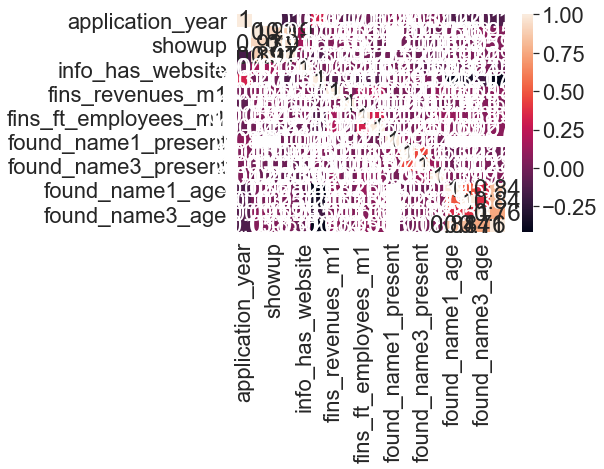

In [195]:
#Correlation
sns.heatmap(df.corr(),annot=True)

From the above heatmap we do observe a slight correlation between the found_name1_age,found_name3_age and showup. 

C:\Users\faimu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\faimu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


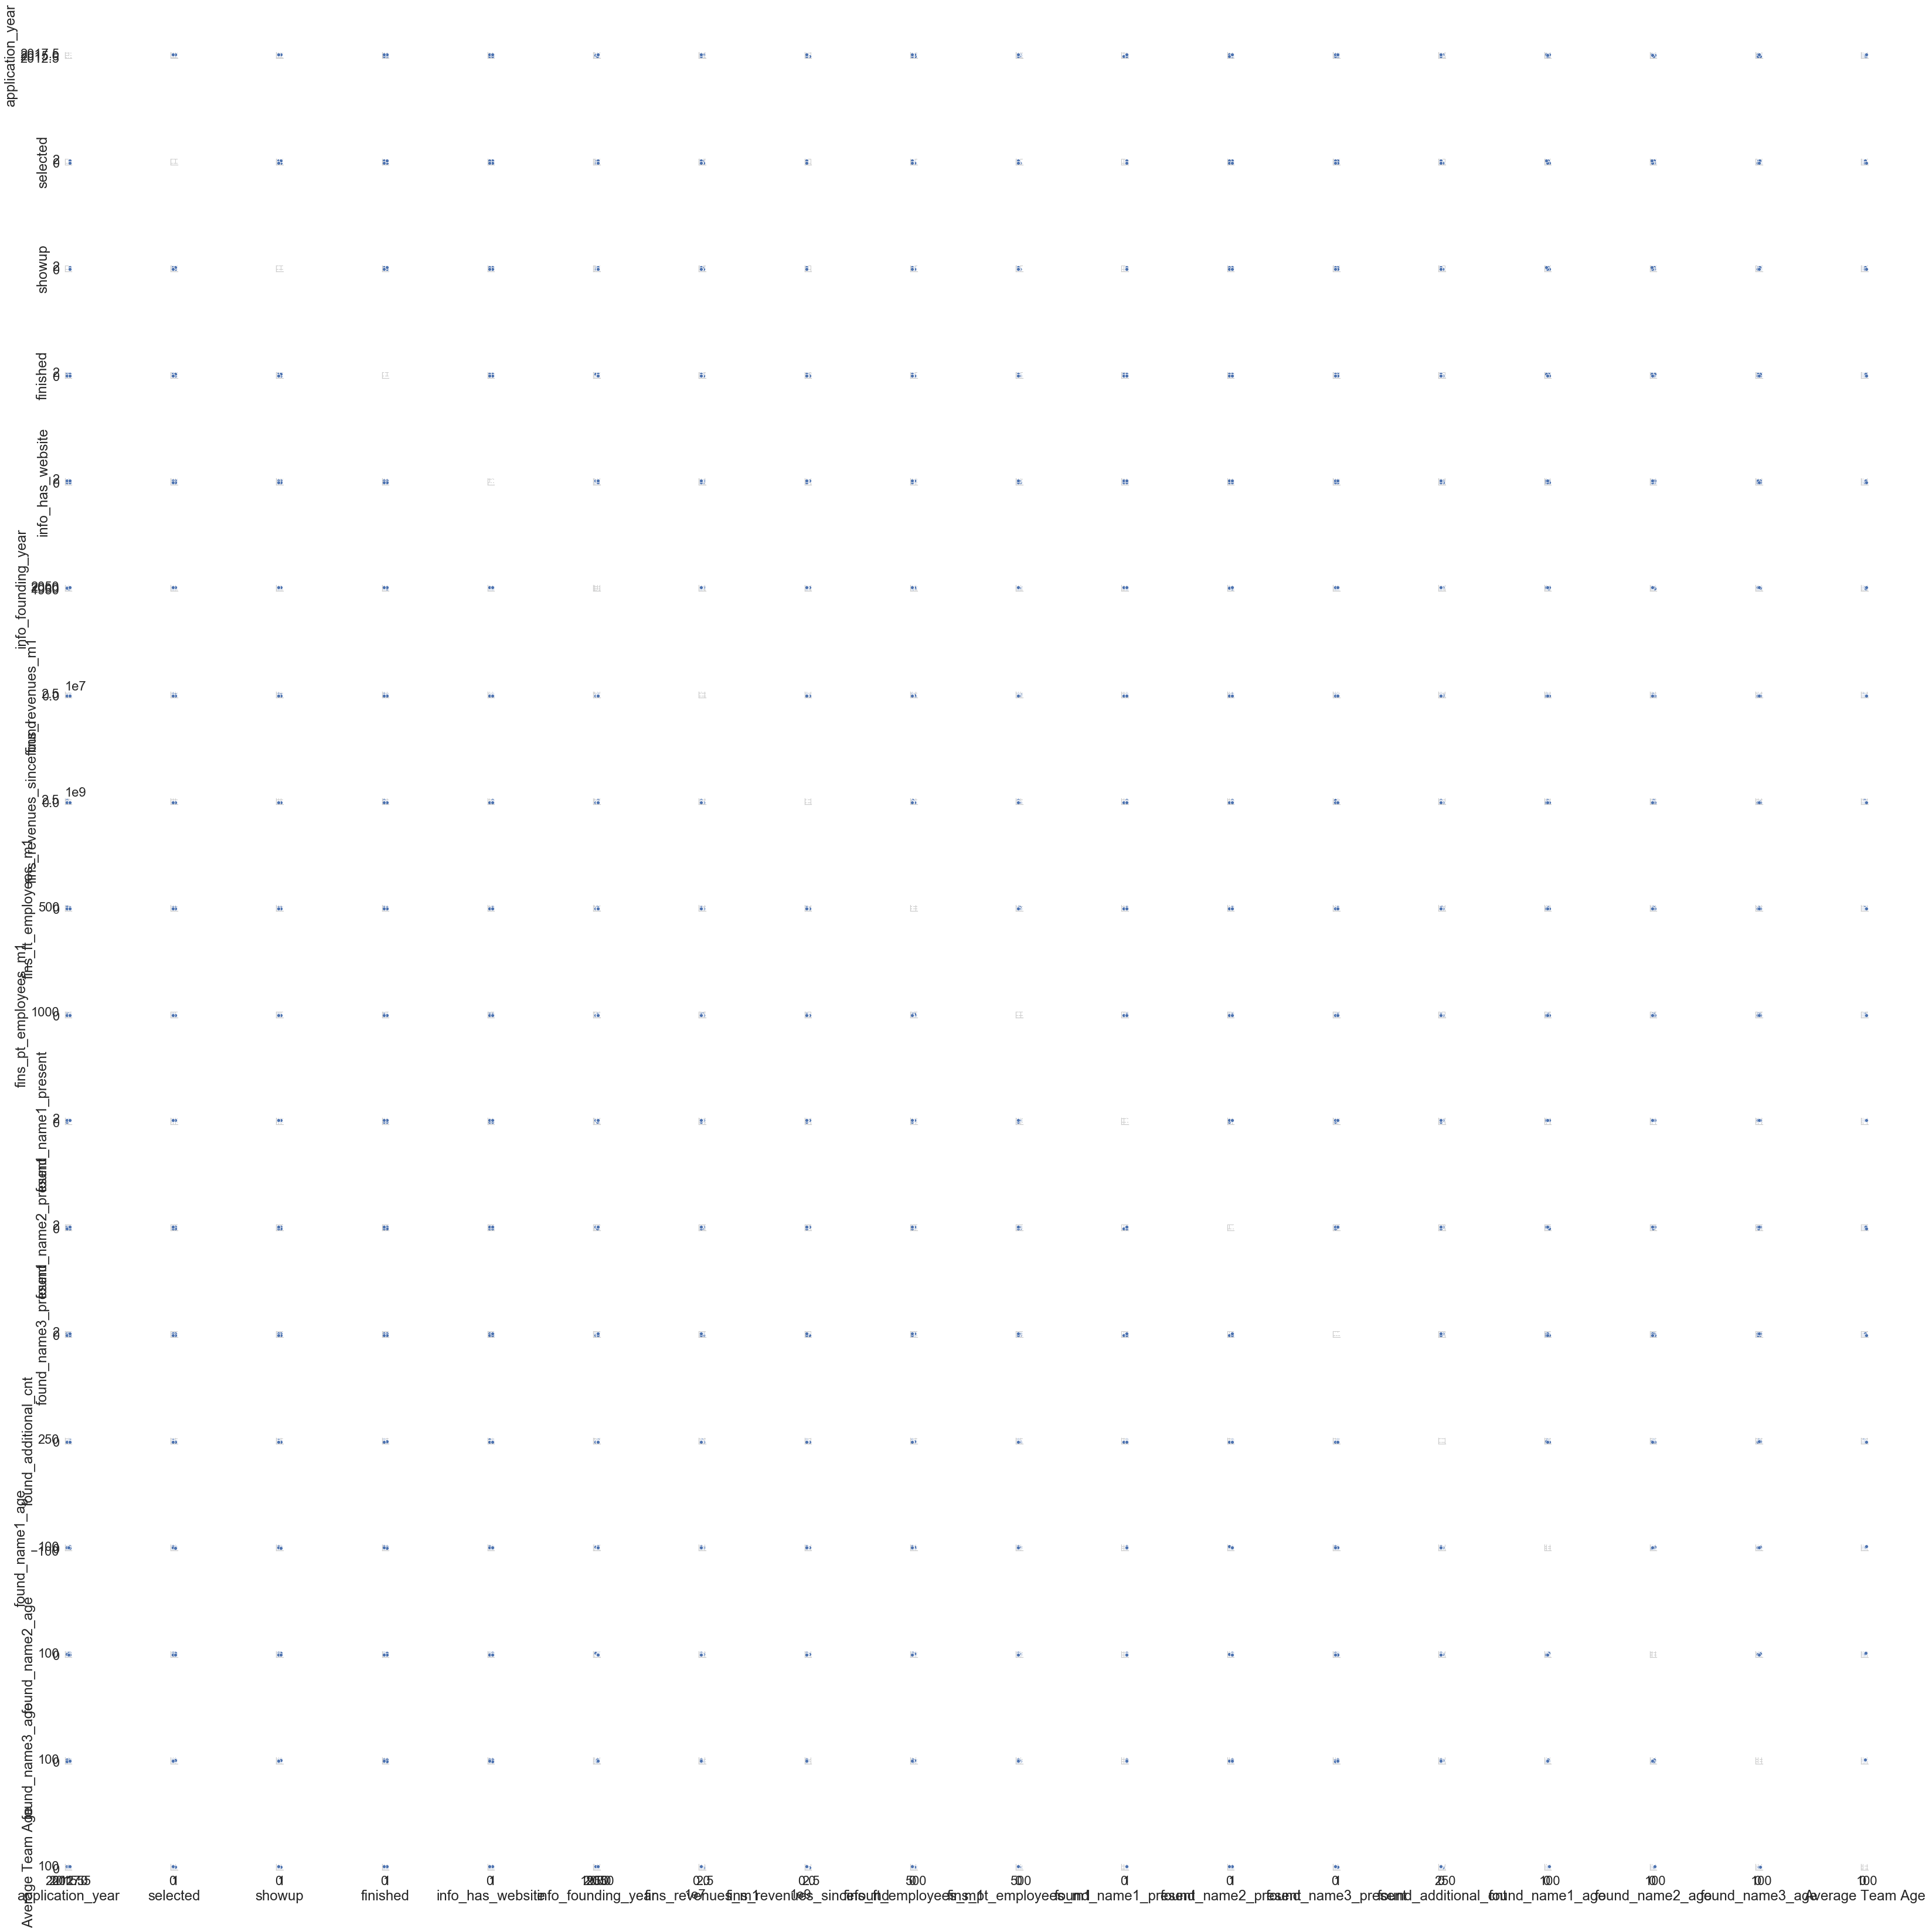

In [196]:
sns.pairplot(df,palette="husl")

C:\Users\faimu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\faimu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


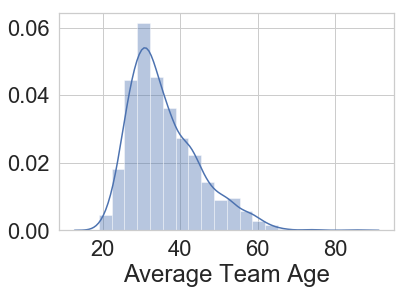

In [197]:
sns.distplot(df['Average Team Age'],bins=20)

From the plot above we can observe that:-
i)Most registered their business from the age of 30 to 40 plus years but after the age of 60 they stopped or ended their enterpreneurship career were catagorised as finished enterpreneurs.

ii)Age is a demographic factor since places with high pouplation of people intheir twenties and thirties will inevitably experience  growth in terms of info_financial_goals in relatively a short time.this is because majority of this individuals are young professionals who will demand proximity to local retailers and transcript links encouraging more local and inernational business owners to the respective countries.


# Bar plot showing the distribution of info_sector  against the Average Team Age

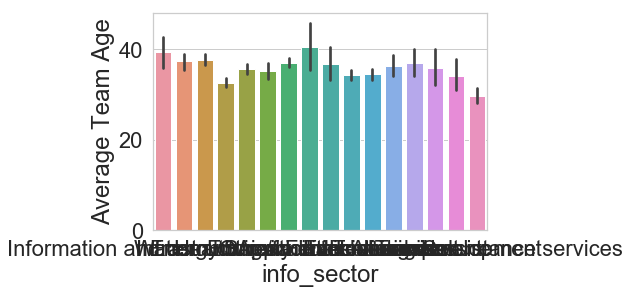

In [119]:
sns.barplot(x=df['info_sector'],y=df['Average Team Age'],
            data=df)


As we can see from the plot above, the info_sector  fluctuates respectively  as they age, and 
more explicitly we can say that the more the sector is recently released, the Age augment. 
Therefore,this is totally logical since whenever the sector is introduced in the market the more
its become kind new to clients hence affecting the various Teams in regards to the Average Age(they decreases).


# Violinplot showing the Average Team Age against selected, finished, showup

In [128]:
#sns.violinplot(y=df['Average Team Age'],x=df['finished'],
              # hue=df['Transmission'],split=True,
               #palette="Set2",data=df)

# Top 100 countries info_venture_country distribution in respect to info_sector

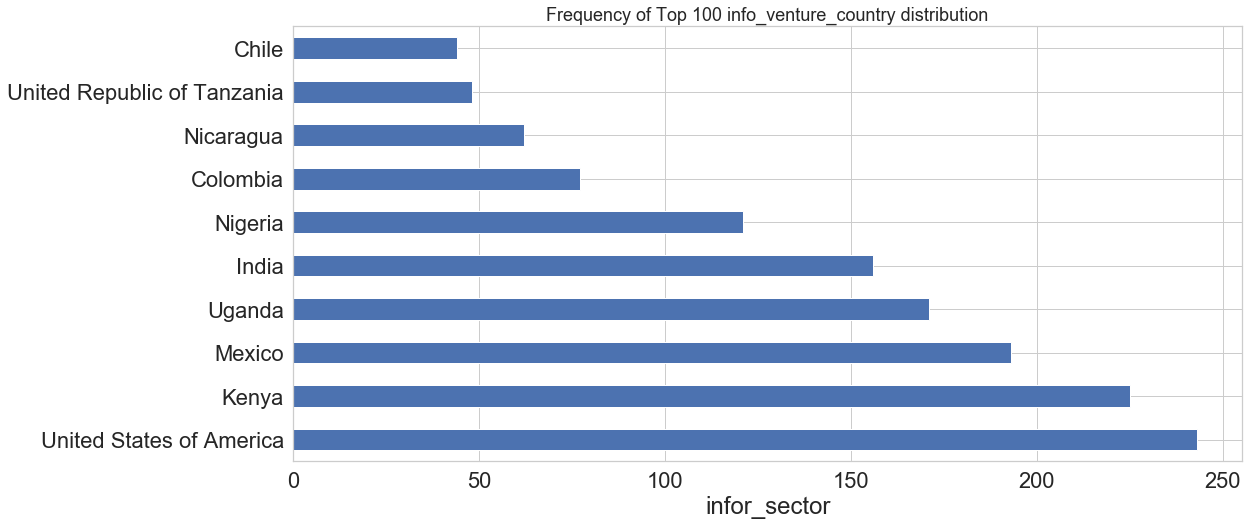

In [129]:
plt.figure(figsize=(17,8))
df.info_venture_country.value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('infor_sector')
plt.title("Frequency of Top 100 info_venture_country distribution",fontsize=18)
plt.show()

Afew ccountries are experiencing minimal return invetsment since they have already reached the glass ceiling.
However,Some of the venture countries are hugely promising as the areas open up due to infrastructure developments points out  the high ranked country in regards to info_sector.
Also some columns did not have some insights, like for instance comparison on the ventures of fin_emp_ft and fin_emp_pt in terms of those who finished full time and those who finished part time.

# Data modelling

# Training a Linear Regression Model
First we will need to first split up our data into an X array that contains the features to train on, 
and a y array with the target variable, in this case the info_sector

Train Test Split Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [130]:
from sklearn.model_selection import train_test_split

In [212]:
#defining feature matrix(X) and response vector(y) 
#x=info_sector
#y=Average Team age

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=1)



NameError: name 'x' is not defined

# Creating and Training the Model¶

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lm = LinearRegression()

In [135]:
lm.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
print(lm.intercept_)